# Categorical Data - Data Cleaning and EDA 

I choose the dataset from kaggle. I specially picked the records only related to dogs using Excel and conducted analysis on that.
https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and#aac_shelter_outcomes.csv

The datasets is mainly about Categorical data. Let's see what we can do about it.


## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('../../datasets/animal/shelter_dog.csv')

In [3]:
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
1,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
2,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
3,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male
4,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23T00:00:00,2014-12-08T15:55:00,2014-12-08T15:55:00,*Ella,Partner,Transfer,Spayed Female


In [4]:
data.isnull().sum()

age_upon_outcome        5
animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
name                 7056
outcome_subtype     30667
outcome_type            4
sex_upon_outcome        2
dtype: int64

In [5]:
data['outcome_subtype'].value_counts()

Partner                9516
Foster                 2162
Suffering               684
Aggressive              501
Offsite                 254
Behavior                142
In Kennel                87
Rabies Risk              85
Medical                  60
At Vet                   23
In Foster                23
Court/Investigation      18
In Surgery                7
Possible Theft            7
Enroute                   4
Snr                       1
Barn                      1
Name: outcome_subtype, dtype: int64

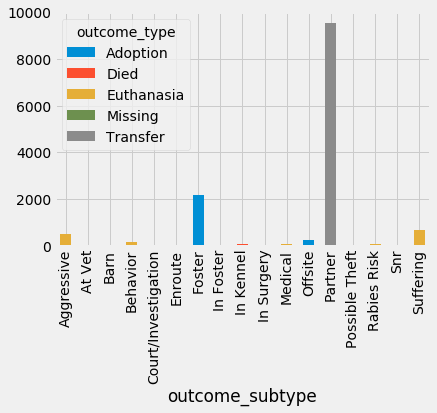

In [6]:
data_outcome_sub=data.groupby(['outcome_type','outcome_subtype']).size().unstack('outcome_type').fillna(0)
data_outcome_sub.plot(kind='bar',stacked=True)
plt.show()

So for outcome_subtype or name column, there is too much null value. Also, the relationship between outcome_subtype & outcome is clear: Euthanasis were done on dogs that were aggressive, suffering, behavior problem, and at rabies risks.There is no mixture.Therefore, I decided to remove it.

In [9]:
data = data.drop(['outcome_subtype','name','animal_type','date_of_birth','datetime'],axis=1)

In [10]:
data[data.isnull().values==True]

,age_upon_outcome,animal_id,breed,color,monthyear,outcome_type,sex_upon_outcome
9367,7 years,A667395,Dachshund,Brown Merle,2013-11-27T16:11:00,Return to Owner,NaN
38583,NaN,A737705,Labrador Retriever Mix,Black/White,2016-11-19T16:35:00,NaN,NaN
38583,NaN,A737705,Labrador Retriever Mix,Black/White,2016-11-19T16:35:00,NaN,NaN
38583,NaN,A737705,Labrador Retriever Mix,Black/White,2016-11-19T16:35:00,NaN,NaN
43206,10 years,A718046,Chihuahua Longhair Mix,Cream,2016-03-26T00:00:00,NaN,Neutered Male
43207,10 months,A737930,Pit Bull Mix,Fawn/White,2016-11-17T10:59:00,NaN,Intact Male
43272,NaN,A764319,Pit Bull Mix,Black/White,2017-12-30T16:47:00,NaN,Intact Female
43272,NaN,A764319,Pit Bull Mix,Black/White,2017-12-30T16:47:00,NaN,Intact Female
44118,NaN,A765899,Miniature Poodle Mix,Black,2018-01-29T15:49:00,Euthanasia,Neutered Male
44177,NaN,A765901,Maltese Mix,Buff,2018-01-31T08:14:00,Transfer,Intact Male


In [11]:
#data['outcome_type']=data['outcome_type'].fillna(data['outcome_type'].mode()[0])
#data['sex_upon_outcome']=data['sex_upon_outcome'].fillna(data['sex_upon_outcome'].mode()[0])
#data['age_upon_outcome']=data['age_upon_outcome'].fillna(data['age_upon_outcome'].mode()[0])

Basically,we are using dropna instead of fillna because the NaN values are very centralized in these 10 rows, which could be eliminated considering the 40,000 scale of the whole datasets.

In [12]:
data = data.dropna()

In [13]:
data[data['animal_id'].duplicated().values==True]

,age_upon_outcome,animal_id,breed,color,monthyear,outcome_type,sex_upon_outcome
342,1 year,A622128,Boxer Mix,Brown Brindle/White,2014-01-19T14:43:00,Adoption,Spayed Female
351,4 years,A686467,Catahoula Mix,White/Tan,2014-11-22T19:37:00,Adoption,Neutered Male
640,3 years,A676345,Norfolk Terrier/Yorkshire Terrier,Tan/Black,2014-08-05T08:12:00,Euthanasia,Neutered Male
651,7 months,A664369,Labrador Retriever/German Shepherd,Black,2014-01-08T19:19:00,Return to Owner,Neutered Male
715,4 months,A665383,German Shepherd Mix,Black/Tan,2013-10-23T18:22:00,Adoption,Spayed Female
771,5 years,A681011,Boston Terrier Mix,Brown Brindle/White,2014-08-05T12:13:00,Return to Owner,Spayed Female
959,2 years,A675002,Pit Bull Mix,Blue/White,2014-07-16T13:49:00,Transfer,Spayed Female
1101,8 months,A664666,Australian Cattle Dog Mix,Red Merle,2013-10-12T18:37:00,Adoption,Spayed Female
1229,9 years,A378348,German Shepherd Mix,Black/Brown,2014-04-23T07:43:00,Adoption,Neutered Male
1255,8 months,A677619,Australian Cattle Dog Mix,White/Black Brindle,2014-12-04T17:26:00,Transfer,Neutered Male


For each animal record with same id, we need to keep the latest records.

In [14]:
data=data.sort_values('monthyear')
data.drop_duplicates('animal_id',keep='last',inplace=True)

## Explainatory Data Analysis

### Dog Outcome Type

In [15]:
dogOutcome=data['outcome_type'].copy()
dogOutcome.value_counts()

Adoption           16817
Return to Owner    10242
Transfer            9239
Euthanasia          1500
Died                 138
Rto-Adopt             96
Disposal              17
Missing               12
Name: outcome_type, dtype: int64

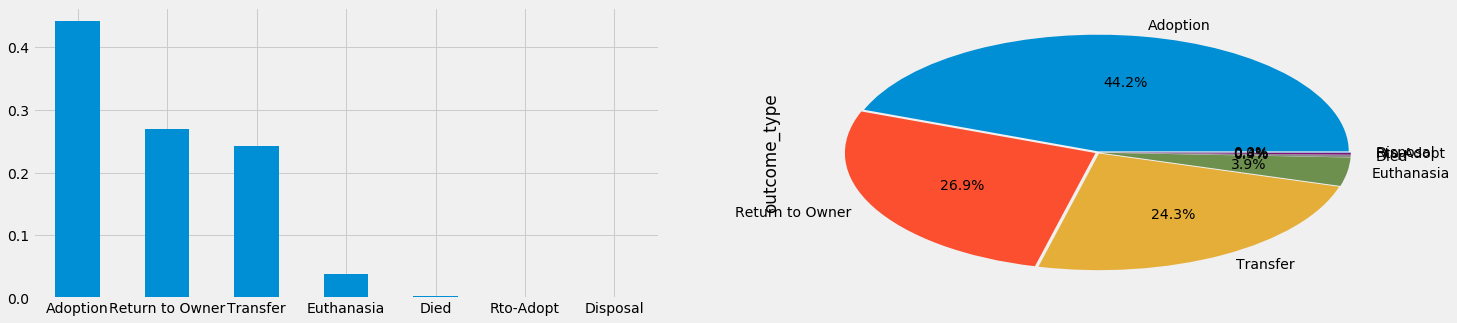

In [16]:
f,ax = plt.subplots(1,2,figsize=(22,5))
dogOutcome.value_counts(normalize=True)[0:7].plot.bar(rot=0,ax=ax[0])
dogOutcome.value_counts()[0:7].plot.pie(explode=[0.01 for i in range(7)],ax=ax[1],autopct='%1.1f%%')
plt.show()

So for dogs in this shelter, 45% of the dogs were adopted, 50% of dogs were transfered or return to owner, 5% of dogs were euthanasia, and 1% or less were died. In general, the shelter taking good care of those dogs.

### Breed Analysis

In [17]:
animalBreed=data['breed']
breedCount=animalBreed.value_counts()
breedCount[breedCount.values>300]

Pit Bull Mix                 4918
Chihuahua Shorthair Mix      4326
Labrador Retriever Mix       3993
German Shepherd Mix          1617
Australian Cattle Dog Mix     922
Dachshund Mix                 738
Miniature Poodle Mix          566
Boxer Mix                     556
Border Collie Mix             553
Australian Shepherd Mix       410
Yorkshire Terrier Mix         409
Rat Terrier Mix               396
Catahoula Mix                 393
Jack Russell Terrier Mix      373
Miniature Schnauzer Mix       356
Siberian Husky Mix            343
Beagle Mix                    336
Chihuahua Longhair Mix        336
Cairn Terrier Mix             303
Name: breed, dtype: int64

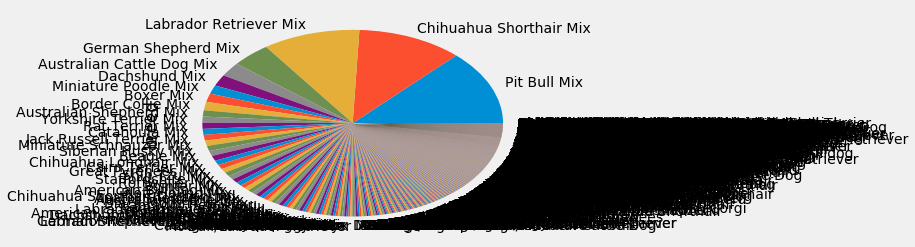

In [18]:
animalBreed.value_counts().plot.pie()
plt.show()

Looks not good...there is tremendous number of breeds in this shleter,but clearly only 4 breeds are very popular:
         
         Pit Bull Mix', 'Chihuahua Shorthair Mix', 'Labrador Retriever Mix','German Shepherd Mix
    

In [19]:
for i in breedCount.index[5:]:
        data['breed'].replace(i,'Other',inplace=True)

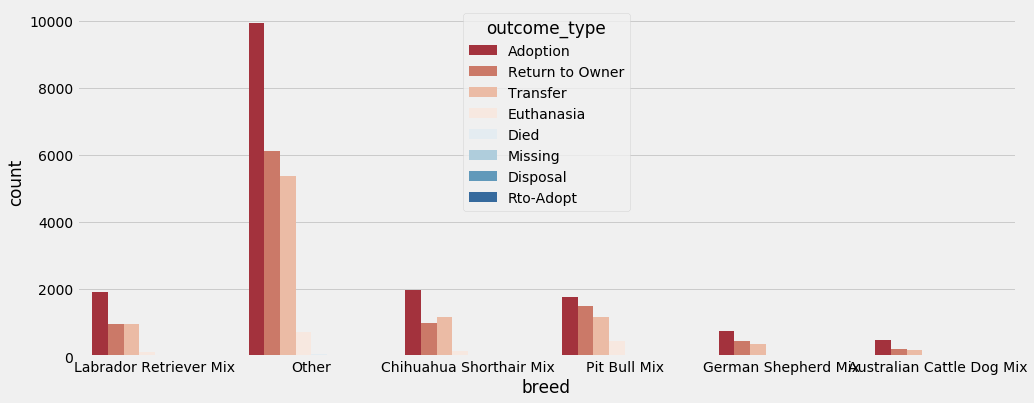

In [20]:
plt.rcParams['figure.figsize']=15,6
sns.countplot(x='breed',hue='outcome_type',palette="RdBu",data=data)
plt.show()

So the distributions of outcome per breed are almost the same and followed the total (which are near 50%,25% and 25%), except pitbull are equally adopted,returne,and transfered, probably pitbulls are usually more attached to it's owner so they will take them again.

###  Sex VS Adoption

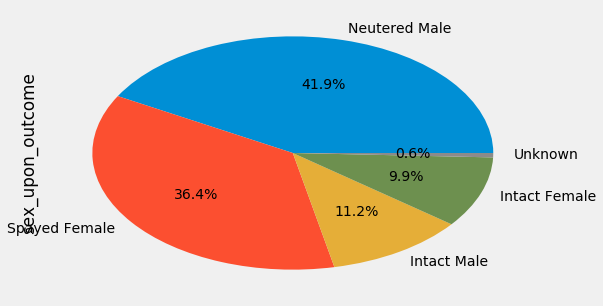

In [21]:
dogSex=data['sex_upon_outcome']
plt.rcParams['figure.figsize']=8,5
dogSex.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

80% of dogs were neutered or spayed, while 20% of dogs were intact.The 0.6% of unknown was confusing, but probably because it died or transfered before examination.

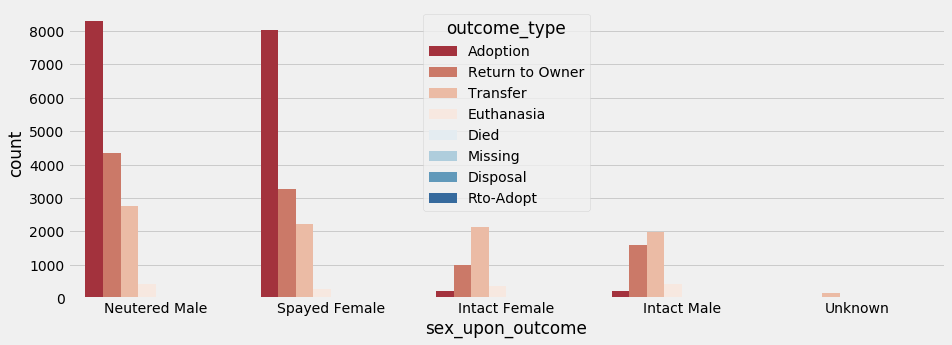

In [22]:
plt.rcParams['figure.figsize']=14,5
sns.countplot(x='sex_upon_outcome',hue='outcome_type',palette="RdBu",data=data)
plt.show()

Alghough the total number of neutered and spayed dogs differed from intact dogs, the proportion still showed that intact animals were generally transfered than adopted, as surgery greatly enhance the possibility of adoption.

In [23]:
data_mosaic_prep = data.copy()

In [24]:
for v in data_mosaic_prep['outcome_type'].value_counts().index:
    if v not in data_mosaic_prep['outcome_type'].value_counts().index[:3]:
        data_mosaic_prep['outcome_type'].replace(v,'Other',inplace=True)

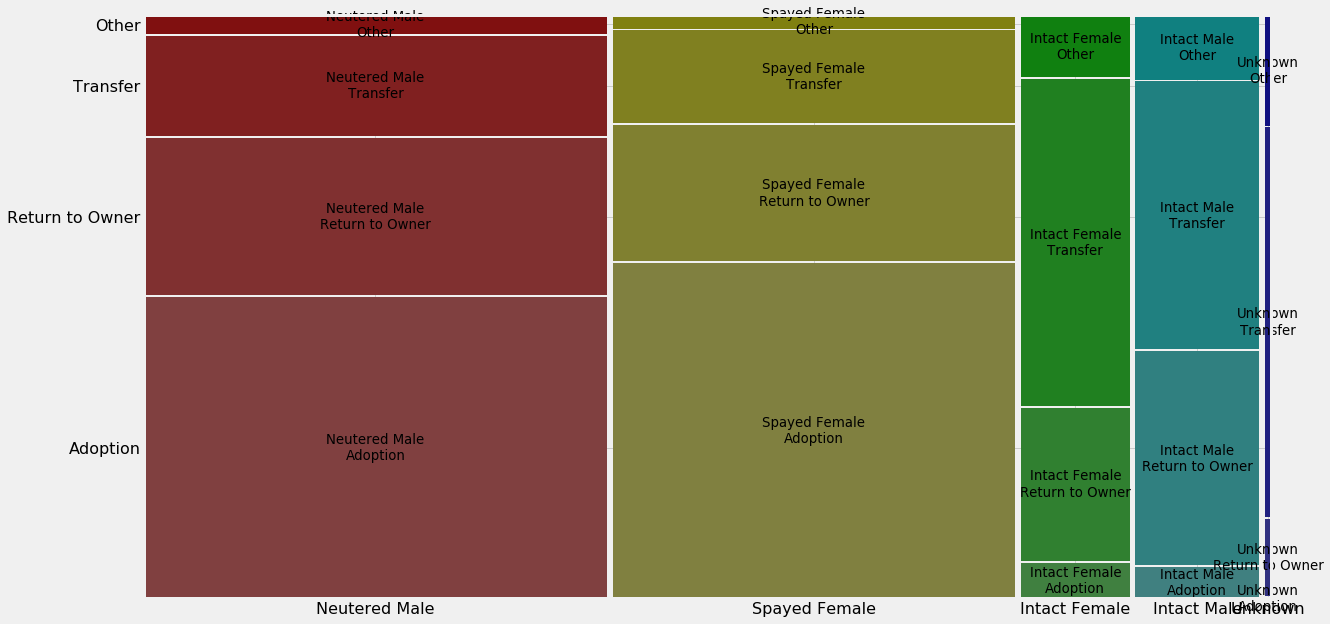

In [25]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['figure.figsize']=18,10
plt.rcParams['font.size'] = 16.0
mosaic(data_mosaic_prep, ['sex_upon_outcome','outcome_type'])
plt.xticks(rotation=90)
plt.show()

Clearly, for neutered or spayed dogs, 40% of them were adopted, while only 10% of intact dogs were adopted.So neutered male or spayed female has higher possibility of getting adopted than intact female and intact male. It's understandable why people prefer to adopt neutered dogs: less troubles and surgery fee.

### Color VS Adoption

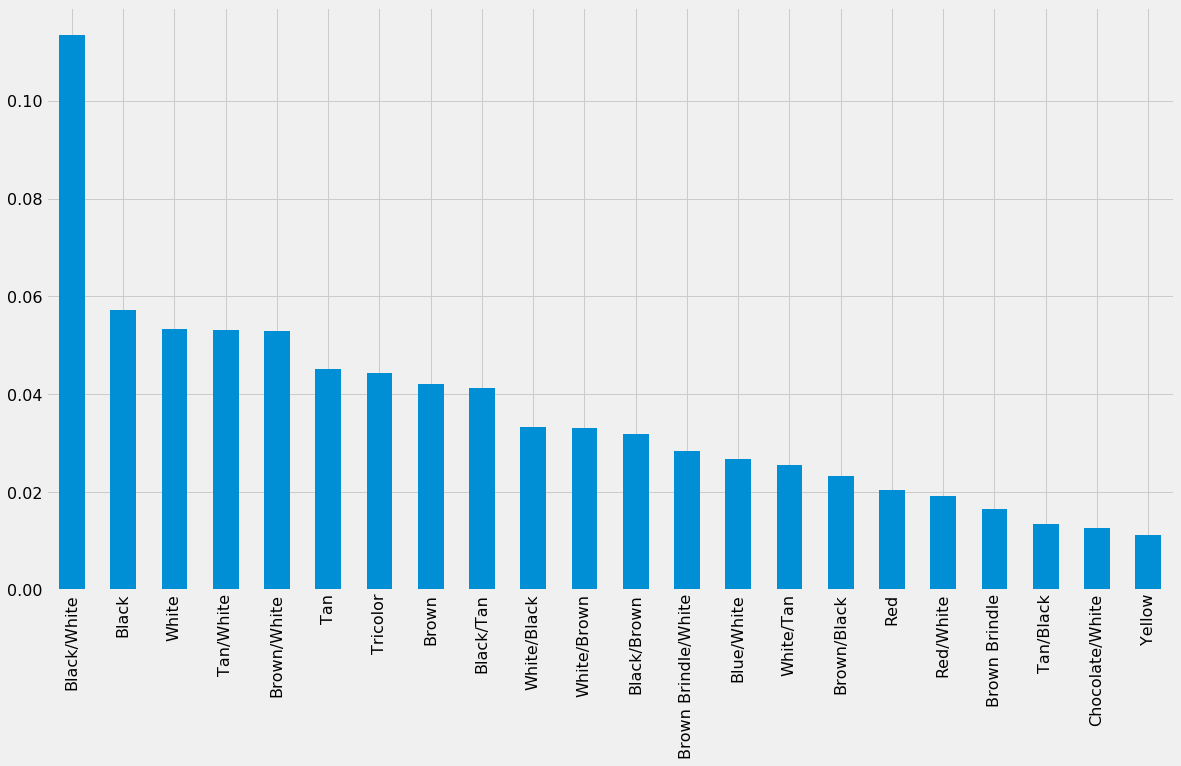

In [26]:
dogColor=data['color']
dogColor.value_counts(normalize=True)[dogColor.value_counts(normalize=True).values>0.01].plot.bar()
plt.show()

In [27]:
sum(dogColor.value_counts(normalize=True)[dogColor.value_counts(normalize=True).values>0.01])

0.79908567825333021

Let's only look at the most common colors of dogs(with frequency higher than 0.01),and they took 80% of the total dogs. Black/White took 1/10 of total dogs, and the rest had a proportion of either 0.05 or 0.02.

In [28]:
for i in dogColor.value_counts(normalize=True)[dogColor.value_counts(normalize=True).values<0.01].index:
    dogColor.replace(i,'Other',inplace=True) 

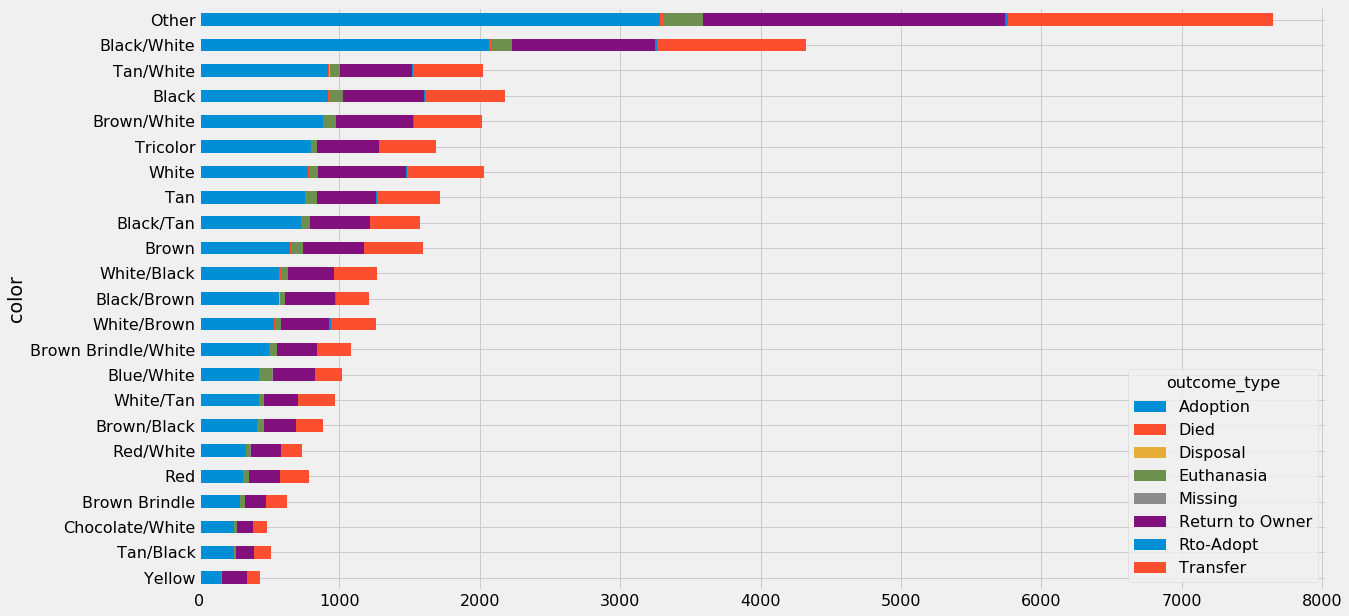

In [29]:
dogColorVsOutcome = data.groupby(['color','outcome_type']).size().unstack('outcome_type').fillna(0).sort_values(by='Adoption')
dogColorVsOutcome.plot(kind='barh',stacked=True)
plt.show()

Seems that the color didn't affect the outcome result too much, that for each color the outcome_type follows the total distribution of outcome type.

### Age VS Adoption

In [30]:
dogAge = data['age_upon_outcome']

In [31]:
for v in dogAge.value_counts().index:
    if v.split()[1] in('day','days','week','weeks'):
        dogAge.replace(v,0,inplace=True)
    dogAge.replace('0 years',0 ,inplace=True)
    if v.split()[1] in('year','years'):
        dogAge.replace(v,int(v.split()[0])*12,inplace=True)
    elif v.split()[1] in('month','months'):
        dogAge.replace(v,int(v.split()[0]),inplace=True)

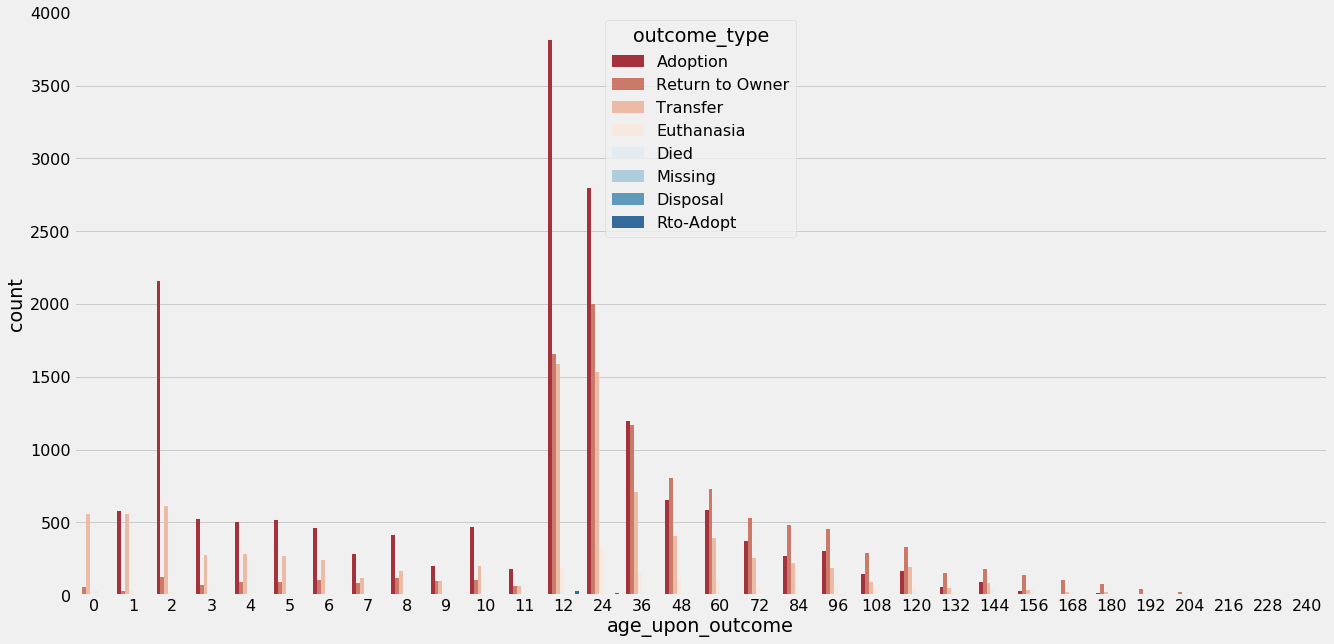

In [32]:
plt.rcParams['figure.figsize']=20,10
sns.countplot(x='age_upon_outcome',hue='outcome_type',palette="RdBu",dodge=True,data=data)
plt.show()

Although it shows that a adoption tendency which tops at 1 year dogs and decreased as the ages grew. It was too narrow here.Let's plot it in a anther way and see something different.

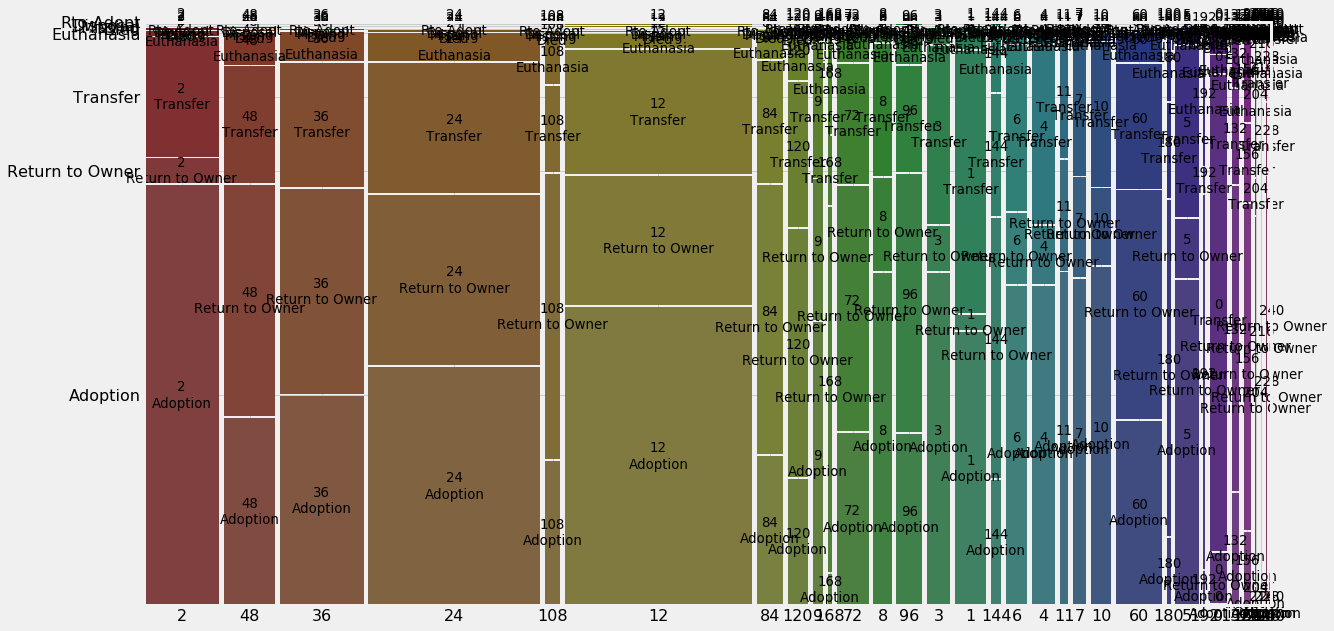

In [33]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['figure.figsize']=18,10
plt.rcParams['font.size'] = 16.0
mosaic(data, ['age_upon_outcome','outcome_type'])
plt.xticks(rotation=90)
plt.show()

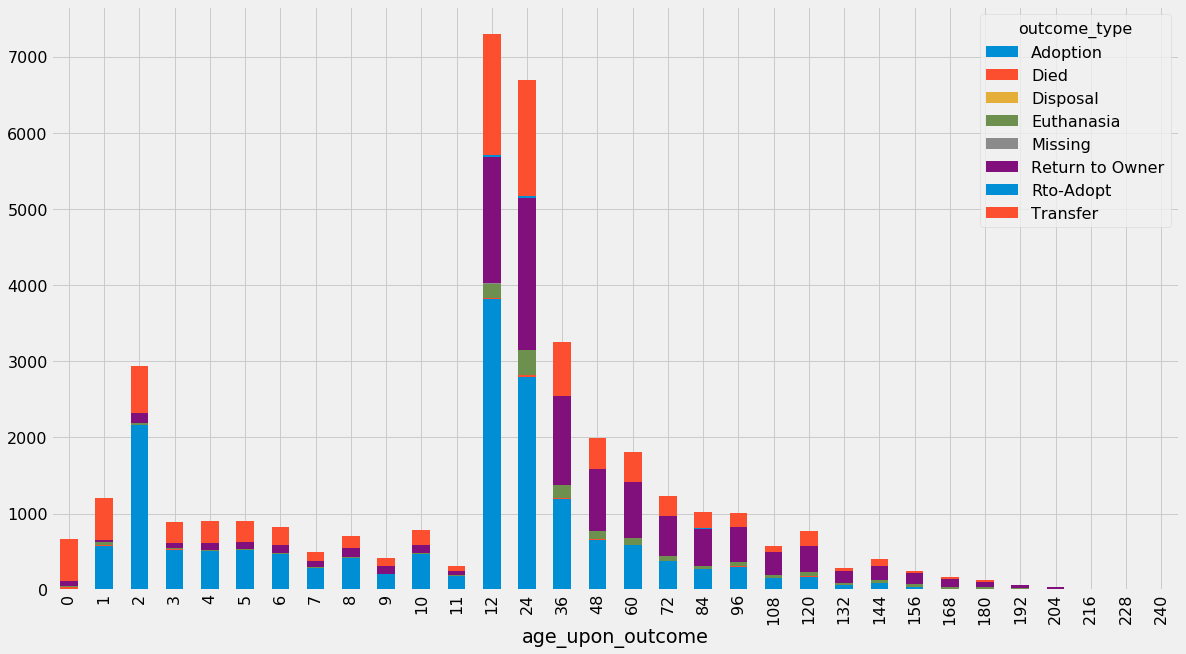

In [34]:
df2 = data.groupby(['age_upon_outcome','outcome_type'])['outcome_type'].count().unstack('outcome_type').fillna(0)
df2[['Adoption','Died','Disposal','Euthanasia','Missing','Return to Owner','Rto-Adopt','Transfer']].plot(kind='bar', stacked=True)
plt.show()

Although puppies at 12 months or 24 months seems more likely to be adopted, but the number of dogs at this 2 ages are most common. So let's compare by only looking at dogs at the seem month: trend is that, people tend to adopt young puppies at age of 2 months or 1-2 years, as ages grew, dog are more likely to return to it's original owner than being adopted. Transfered puppies are more of baby puppies, probably because they are weaker and need more medical care.

So, after EDA we have some conclusions in mind:age & sex were the biggest factors affecting the final result,while breed and color barely affect it contract to our intuition.